[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Jonarod/Bootcamp-Inteligencia-Artificial-Women-Who-Code-Medellin/blob/master/semana%203/CNN%20clasificacion/LeNet-5/LeNet_5_mnist.ipynb)

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import  train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D, AveragePooling2D, Activation

In [ ]:
# (trainX, trainY), (testX, testY) 
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [ ]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

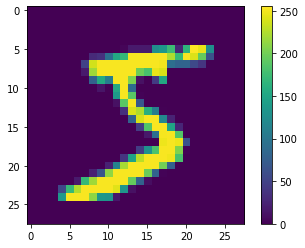

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Normalizacion
train_images = train_images / 255
test_images = test_images / 255

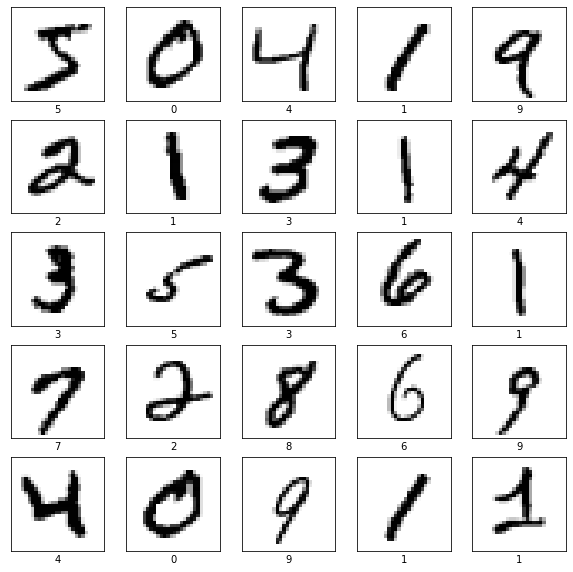

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# Original LeNet requiere 32x32 en entrada
# Agregamos padding a las imagenes
train_images = tf.pad(train_images, [[0, 0], [2,2], [2,2]])
test_images = tf.pad(test_images, [[0, 0], [2,2], [2,2]])

train_images.shape

TensorShape([60000, 32, 32])

In [ ]:
# Norma para conv2D es recibir shape con [batch, in_height, in_width, in_channels]
# Agregando dimension "1" para "in_channels"

train_images = tf.expand_dims(train_images, axis=3, name=None)
test_images = tf.expand_dims(test_images, axis=3, name=None)

test_images.shape

TensorShape([10000, 32, 32, 1])

In [ ]:
# Creacion del modelO
model = Sequential()

model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=train_images.shape[1:], padding="same"))
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
model.add(Flatten())
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 16, 16, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 6, 6, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 120)               6

In [ ]:
# Entrenamiento
history = model.fit(train_images, train_labels, batch_size=64, epochs=40, validation_data=(test_images, test_labels))

Epoch 1/40
938/938 [==============================] - 52s 54ms/step - loss: 0.2672 - accuracy: 0.9213 - val_loss: 0.1217 - val_accuracy: 0.9630
Epoch 2/40
938/938 [==============================] - 53s 56ms/step - loss: 0.1002 - accuracy: 0.9688 - val_loss: 0.0829 - val_accuracy: 0.9746
Epoch 3/40
938/938 [==============================] - 49s 52ms/step - loss: 0.0665 - accuracy: 0.9794 - val_loss: 0.0732 - val_accuracy: 0.9772
Epoch 4/40
938/938 [==============================] - 50s 53ms/step - loss: 0.0499 - accuracy: 0.9839 - val_loss: 0.0607 - val_accuracy: 0.9817
Epoch 5/40
938/938 [==============================] - 49s 52ms/step - loss: 0.0396 - accuracy: 0.9874 - val_loss: 0.0538 - val_accuracy: 0.9824
Epoch 6/40
938/938 [==============================] - 48s 52ms/step - loss: 0.0309 - accuracy: 0.9904 - val_loss: 0.0545 - val_accuracy: 0.9838
Epoch 7/40
938/938 [==============================] - 49s 52ms/step - loss: 0.0265 - accuracy: 0.9916 - val_loss: 0.0517 - val_accuracy:

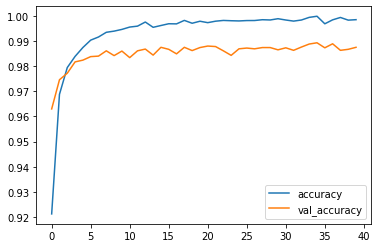

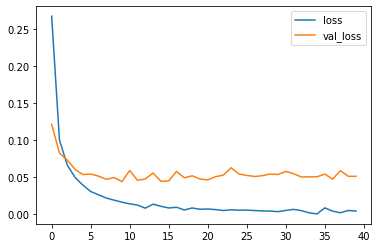

In [ ]:
# Evaluacion del modelo
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

In [ ]:
# La evaluacion del modelo que creamos no es tan buena (no hay convergencia entre "entrenamiento" y "evaluacion")
# Por lo que deberiamos intentar estrategias para mejorar la generalizacion y prevenir el overfitting
#  Unas estrategias posibles son: 
#    - Aumentar el numero de imagenes de entrenamiento
#    - Aumentar la complejidad del modelo agregando mas capas
#    - Agregar Dropout (mejor convergencia pero menos precision)
#    - Regularizacion (L1/L2)
#    - Batch normalizacion
#    - Hyperparametrizacion: ajustar las funciones de activacion, el tamano de los filtros/kernel, ...
#    - Usar otro tipo de modelo mas adaptado
#    - Transfer Learning con otro modelo pre-entrenado
#    - Escribir una tesis para buscar otras formas :)

# Aqui simplement agrego una nueva capa de convoluciones
model2 = Sequential()

model2.add(Conv2D(6, 5, activation='tanh', input_shape=train_images.shape[1:]))
model2.add(AveragePooling2D(2))
model2.add(Activation('sigmoid'))
model2.add(Conv2D(16, 5, activation='tanh'))
model2.add(AveragePooling2D(2))
model2.add(Activation('sigmoid'))
model2.add(Conv2D(120, 5, activation='tanh'))
model2.add(Flatten())
model2.add(Dense(84, activation='tanh'))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 activation (Activation)     (None, 14, 14, 6)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 activation_1 (Activation)   (None, 5, 5, 16)         

In [ ]:
history2 = model.fit(train_images, train_labels, batch_size=64, epochs=40, validation_data=(test_images, test_labels))

Epoch 1/40
907/907 [==============================] - 5s 4ms/step - loss: 1.3258 - accuracy: 0.5229 - val_loss: 0.2717 - val_accuracy: 0.9235
Epoch 2/40
907/907 [==============================] - 4s 4ms/step - loss: 0.3514 - accuracy: 0.8903 - val_loss: 0.2052 - val_accuracy: 0.9420
Epoch 3/40
907/907 [==============================] - 4s 4ms/step - loss: 0.2746 - accuracy: 0.9127 - val_loss: 0.1530 - val_accuracy: 0.9560
Epoch 4/40
907/907 [==============================] - 4s 4ms/step - loss: 0.2293 - accuracy: 0.9273 - val_loss: 0.1287 - val_accuracy: 0.9655
Epoch 5/40
907/907 [==============================] - 4s 4ms/step - loss: 0.1991 - accuracy: 0.9369 - val_loss: 0.1092 - val_accuracy: 0.9720
Epoch 6/40
907/907 [==============================] - 4s 4ms/step - loss: 0.1792 - accuracy: 0.9436 - val_loss: 0.1152 - val_accuracy: 0.9690
Epoch 7/40
907/907 [==============================] - 4s 4ms/step - loss: 0.1633 - accuracy: 0.9485 - val_loss: 0.0930 - val_accuracy: 0.9790
Epoch 

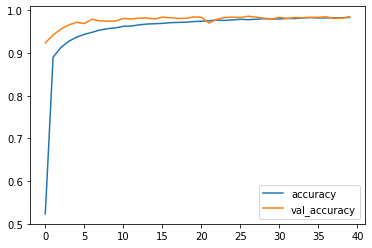

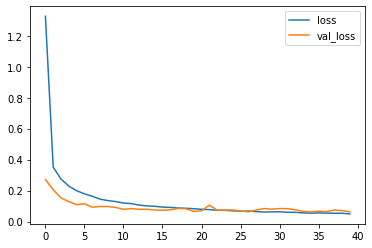

In [ ]:
evaluation = pd.DataFrame(model2.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

In [ ]:
predictions = model.predict(test_images)


In [ ]:
predictions[0]

array([3.3074520e-12, 2.8389608e-11, 2.5176492e-13, 1.2745395e-10,
       1.0705404e-10, 2.2015859e-13, 4.5254559e-18, 1.0000000e+00,
       3.8431105e-13, 1.3216441e-09], dtype=float32)

In [ ]:
np.argmax(predictions[0])

7

In [ ]:
test_labels[0]

7